---------------------------------DATA PREPROCESSING---------------------------------

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

import datasets.data as data
from descent_algorithms import *
from models import *
from util import *

In [9]:
features, labels = data.load_wisconsin_breast_cancer()
wbc_X_train, wbc_X_test, wbc_y_train, wbc_y_test = train_test_split(
    features, labels, test_size=0.2)
# print(features.shape)
# print(labels.shape)

# print (features[0])
# print (labels)

M_features, M_labels = data.load_MNIST_13()
MNIST_X_train, MNIST_X_test, MNIST_y_train, MNIST_y_test = train_test_split(
    M_features, M_labels, test_size = 0.2)

# print(M_features.shape)
# print(M_labels.shape)

# print (M_features[0])
# print (M_labels)

cod_features, cod_labels = data.load_cod_rna()
# print(cod_features.shape)
# print(cod_labels.shape)

# print(cod_features[0])
# print(cod_labels)

cod_X_train, cod_X_test, cod_y_train, cod_y_test = train_test_split(
    cod_features, cod_labels, test_size = 0.2)

In [10]:
#Learning Rate Objects
lr = FixedRate(0.001)

lr1 = FixedRate(0.00001)

lr2 = FixedRate(0.0001)

In [11]:
#Descent Algorithm Objects
gd = GradientDescent()
gd1 = GradientDescent()
gd2 = GradientDescent()
# gd = StochasticVarianceReducedGradientDescent()
# gd = NesterovAcceleratedDescent()

In [12]:
#Models(descent_algo, learning rate, iterations, batch)
logreg = LogisticRegression(gd, lr, 25000, wbc_X_train.shape[0])

cod_logreg = LogisticRegression(gd1, lr1, 25000, cod_X_train.shape[0])

MNIST_logreg = LogisticRegression(gd2, lr2, 2500, MNIST_X_train.shape[0])




In [13]:
loss = logreg.fit(wbc_X_train, wbc_y_train)

loss_cod = cod_logreg.fit(cod_X_train, cod_y_train)

loss_MNIST = MNIST_logreg.fit(MNIST_X_train, MNIST_y_train)

Iter:        0 train loss: 385.360
Iter:     2500 train loss: 249.695
Iter:     5000 train loss: 235.068
Iter:     7500 train loss: 230.211
Iter:    10000 train loss: 228.117
Iter:    12500 train loss: 227.087
Iter:    15000 train loss: 226.536
Iter:    17500 train loss: 226.223
Iter:    20000 train loss: 226.038
Iter:    22500 train loss: 225.924
Iter:        0 train loss: 32624.829
Iter:     2500 train loss: 16054.145
Iter:     5000 train loss: 15478.478
Iter:     7500 train loss: 15375.514
Iter:    10000 train loss: 15350.594
Iter:    12500 train loss: 15343.747
Iter:    15000 train loss: 15341.697
Iter:    17500 train loss: 15341.006
Iter:    20000 train loss: 15340.714
Iter:    22500 train loss: 15340.540
Iter:        0 train loss: nan
Iter:      250 train loss: 185.474
Iter:      500 train loss: 145.757
Iter:      750 train loss: 123.354
Iter:     1000 train loss: nan
Iter:     1250 train loss: nan
Iter:     1500 train loss: nan
Iter:     1750 train loss: nan
Iter:     2000 train

In [14]:
#modelAccuracyCheck
acc = check_accuracy(logreg, wbc_X_test, wbc_y_test)
print("Model Accuracy: {0:.2f}%".format(acc * 100))

acc = check_accuracy(cod_logreg, cod_X_test, cod_y_test)
print("Model Accuracy: {0:.2f}%".format(acc * 100))

acc = check_accuracy(MNIST_logreg, MNIST_X_test, MNIST_y_test)
print("Model Accuracy: {0:.2f}%".format(acc * 100))



Model Accuracy: 90.71%
Model Accuracy: 87.68%
Model Accuracy: 99.18%


NameError: name 'accuracies' is not defined

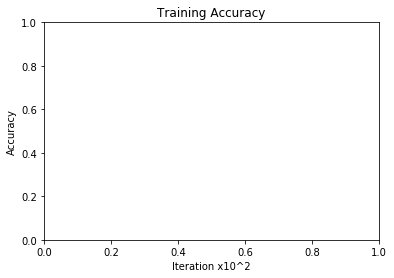

In [8]:
import matplotlib.pyplot as plt
plt.figure(200)
plt.title('Training Accuracy')
plt.xlabel('Iteration x10^2')
plt.ylabel('Accuracy')
plt.plot(accuracies, 'b')
plt.show()
plt.figure(300)
plt.title('Validation Accuracy')
plt.xlabel('Iteration x10^2')
plt.ylabel('Accuracy')
plt.plot(val_accuracies, 'b')
plt.show()